# *Metode CNN*

# **Set Up Library**

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, Input
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# **Load Dataset**

In [2]:
BASE_DIR_DRO = 'Drowsy_datset/train/DROWSY/'
BASE_DIR_NAT = 'Drowsy_datset/train/NATURAL/'
DROWSY_LISTDIR = os.listdir(BASE_DIR_DRO)
NATURAL_LISTDIR = os.listdir(BASE_DIR_NAT)

In [3]:
dct_dataset = {
    'path':[],
    'class':[]
}

In [4]:
for dro in DROWSY_LISTDIR:
    full_path = BASE_DIR_DRO+dro
    kelas = 'DROWSY'
    dct_dataset['path'].append(full_path)
    dct_dataset['class'].append(kelas)

for nat in NATURAL_LISTDIR:
    full_path = BASE_DIR_NAT+nat
    kelas = 'NATURAL'
    dct_dataset['path'].append(full_path)
    dct_dataset['class'].append(kelas)

df = pd.DataFrame.from_dict(dct_dataset)
df

,path,class
0,Drowsy_datset/train/DROWSY/1.jpg_0.png,DROWSY
1,Drowsy_datset/train/DROWSY/1.png,DROWSY
2,Drowsy_datset/train/DROWSY/10.jpg_0.png,DROWSY
3,Drowsy_datset/train/DROWSY/10.png,DROWSY
4,Drowsy_datset/train/DROWSY/100.png,DROWSY
...,...,...
5854,Drowsy_datset/train/NATURAL/v1008.png,NATURAL
5855,Drowsy_datset/train/NATURAL/v1009.png,NATURAL
5856,Drowsy_datset/train/NATURAL/v1010.png,NATURAL
5857,Drowsy_datset/train/NATURAL/v1011.png,NATURAL


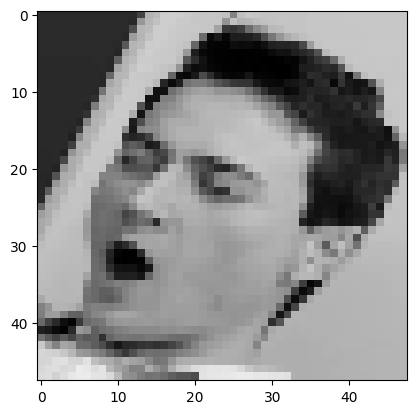

In [5]:
img = cv2.imread(df['path'][np.random.randint(0,1000)])
plt.imshow(img)

# Scenario 1

Data tidak melalui tahap preprocessing, kecuali hanya dirubah dalam bentuk Grayscale. Kami akan menggunakan 2 model dengan tingkat kedalaman yang berbeda.

In [6]:
list_img = []
list_class_img = []
for i in range(len(df)):
    path = df['path'][i]
    kelas = df['class'][i]
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) * (1/255)
    list_img.append(gray)
    if kelas == 'NATURAL':
        list_class_img.append([0])
    elif kelas == 'DROWSY':
        list_class_img.append([1])

x_train = np.array(list_img)
y_train = np.array(list_class_img)

## Simple CNN Model

### BUILDING MODEL

In [7]:
model = models.Sequential([
    Input(shape=(48,48,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,083,841 (4.13 MB)

 Trainable params: 1,083,841 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.fit(x_train,
          y_train,
          epochs=15,
          batch_size=32)

model.save('model/CNN1_Sc1.h5')

Epoch 1/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7472 - loss: 0.5189
Epoch 2/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9124 - loss: 0.2310
Epoch 3/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9511 - loss: 0.1409
Epoch 4/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9663 - loss: 0.1049
Epoch 5/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9771 - loss: 0.0686
Epoch 6/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9900 - loss: 0.0497
Epoch 7/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9879 - loss: 0.0455
Epoch 8/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9944 - loss: 0.0258
Epoch 9/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9967 - loss: 0.0208
Epoch 10/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9981 - loss: 0.0175
Epoch 11/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9981 - loss: 0.0132
Epoch 12/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
i_rand = np.random.randint(0, x_train.shape[0])
test = x_train[i_rand].copy()
new_data = test.reshape(1, 48, 48, 1)

# Predict using the model
prediction = model.predict(new_data)
if prediction > 0.5:
    prediction = 1
else: prediction = 0

print("Prediction:", prediction)
print(y_train[i_rand])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction: 1
[1]


### TEST MODEL

In [10]:
BASE_DIR_DRO_test = 'Drowsy_datset/test/DROWSY/'
BASE_DIR_NAT_test = 'Drowsy_datset/test/NATURAL/'
DROWSY_LISTDIR_test = os.listdir(BASE_DIR_DRO_test)
NATURAL_LISTDIR_test = os.listdir(BASE_DIR_NAT_test)

In [11]:
dct_dataset_test = {
    'path':[],
    'class':[]
}

for dro in DROWSY_LISTDIR_test:
    full_path = BASE_DIR_DRO_test+dro
    kelas = 'DROWSY'
    dct_dataset_test['path'].append(full_path)
    dct_dataset_test['class'].append(kelas)

for nat in NATURAL_LISTDIR_test:
    full_path = BASE_DIR_NAT_test+nat
    kelas = 'NATURAL'
    dct_dataset_test['path'].append(full_path)
    dct_dataset_test['class'].append(kelas)

df_test = pd.DataFrame.from_dict(dct_dataset_test)
df_test

,path,class
0,Drowsy_datset/test/DROWSY/1.png,DROWSY
1,Drowsy_datset/test/DROWSY/10.png,DROWSY
2,Drowsy_datset/test/DROWSY/100.jpg_0.png,DROWSY
3,Drowsy_datset/test/DROWSY/102.jpg_0.png,DROWSY
4,Drowsy_datset/test/DROWSY/105.jpg_0.png,DROWSY
...,...,...
1478,Drowsy_datset/test/NATURAL/zc1703.png,NATURAL
1479,Drowsy_datset/test/NATURAL/zc1704.png,NATURAL
1480,Drowsy_datset/test/NATURAL/zc1705.png,NATURAL
1481,Drowsy_datset/test/NATURAL/zc1706.png,NATURAL


In [12]:
list_img = []
list_class_img = []
for i in range(len(df_test)):
    path = df_test['path'][i]
    kelas = df_test['class'][i]
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) * (1/255)
    list_img.append(gray)
    if kelas == 'NATURAL':
        list_class_img.append(0)
    elif kelas == 'DROWSY':
        list_class_img.append(1)

x_test = np.array(list_img)
y_test = list_class_img

In [13]:
x_test.shape

(1483, 48, 48)

In [14]:
pred_list = []

pred_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
prediction = model.predict(pred_test)

print(len(prediction))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
1483


In [15]:
akr = 0
idx_false = []
for i in range(len(y_test)):
    if prediction[i][0] > 0.5:
        pred_list.append(1)
        if y_test[i] == 1:
            akr += 1
        else: idx_false.append(i)
    else: 
        pred_list.append(0)
        if y_test[i] == 0:
            akr += 1
        else: idx_false.append(i)

print(akr/x_test.shape[0])

0.8476062036412677


In [16]:
print(len(idx_false))

226


### Isi CNN dan Visualisasi Proses

In [17]:
conv_layer = model.get_layer(index=0)

In [18]:
conv_layer.weights[0][:, :, 0, 1].numpy()

array([[-0.20672902, -0.06639828, -0.16710623],
       [-0.12900086,  0.10261162,  0.0699511 ],
       [ 0.11929976,  0.03349357,  0.19043864]], dtype=float32)

In [19]:
conv_layer.weights[0].shape

TensorShape([3, 3, 1, 32])

In [20]:
pooling_layer = model.get_layer(index=1)

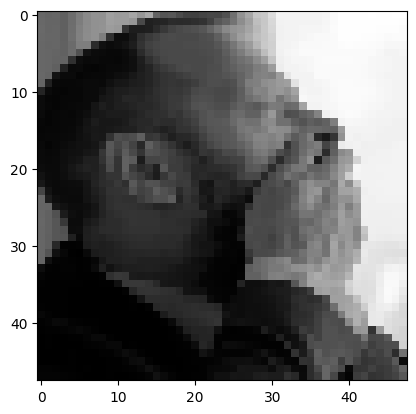

In [21]:
img = cv2.imread(df_test['path'][idx_false[0]])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()

In [22]:
lst_conv = []
for i in range(conv_layer.weights[0].shape[3]):
    kernel = conv_layer.weights[0][:, :, 0, i].numpy()
    img_conv1 = cv2.filter2D(src=gray, ddepth=-1, kernel=kernel)
    lst_conv.append(img_conv1)

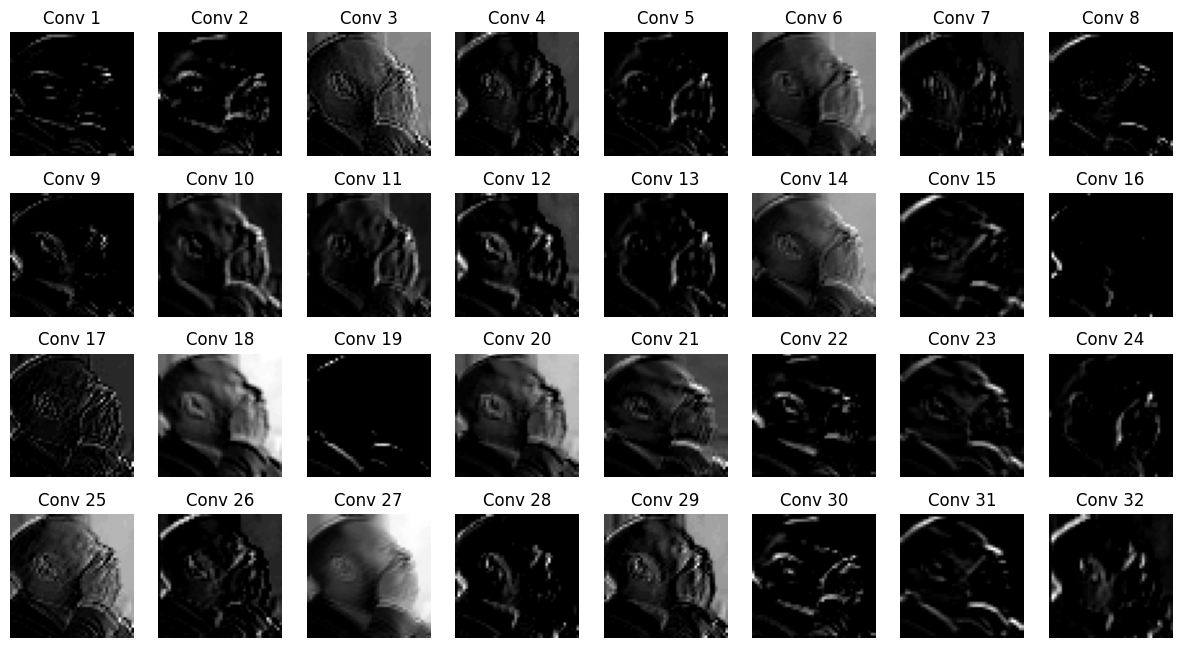

In [23]:
row, col = 0, 0
i = 0
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for img in lst_conv:
    i += 1
    if col > 7:
        col = 0
        row += 1
    axs[row, col].imshow(img, cmap='gray')
    axs[row, col].axis('off')
    axs[row, col].set_title(f"Conv {i}")

    col += 1

plt.show()

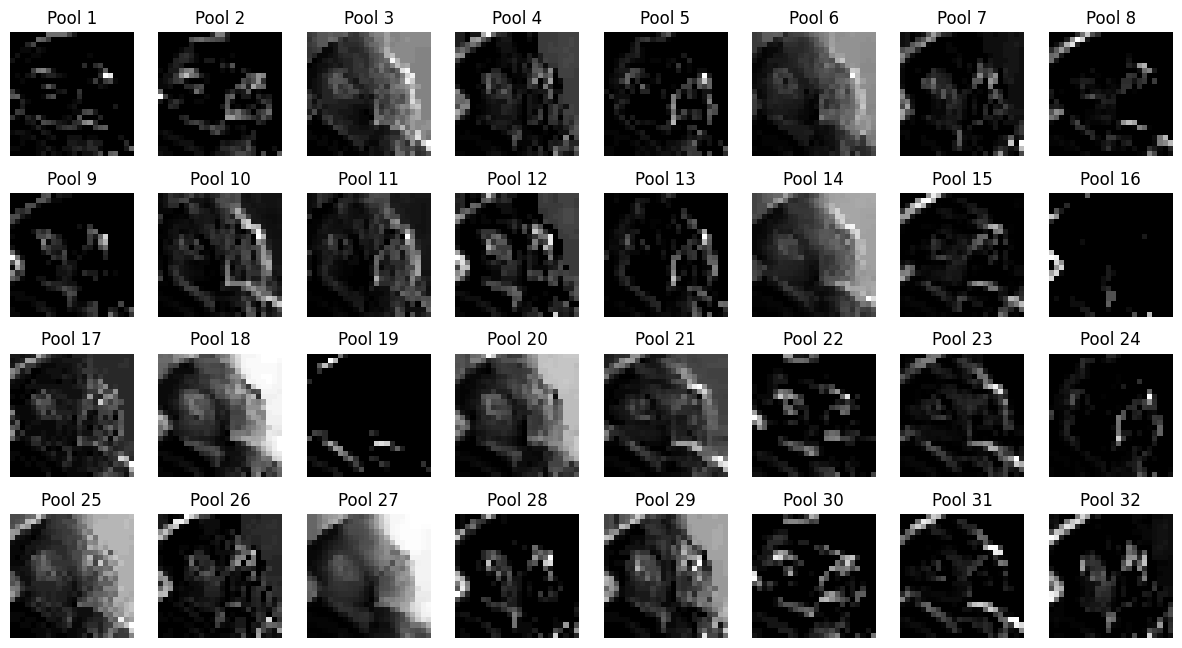

In [24]:
row, col = 0, 0
i = 0
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for img in lst_conv:
    i += 1
    if col > 7:
        col = 0
        row += 1
    img = img.reshape(1, 48, 48, 1).astype("float32") / 255.0
    img_pooled = pooling_layer(img)
    axs[row, col].imshow(img_pooled[0], cmap='gray')
    axs[row, col].axis('off')
    axs[row, col].set_title(f"Pool {i}")

    col += 1

plt.show()

## CNN ke-2

### Building Model

In [25]:
model = models.Sequential([
    Input(shape=(48,48,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.AveragePooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='softmax'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 23, 23, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,085,889 (4.14 MB)

 Trainable params: 1,085,889 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
pred_list = []

pred_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
prediction = model.predict(pred_test)

akr = 0
idx_false = []
for i in range(len(y_test)):
    if prediction[i][0] > 0.5:
        pred_list.append(1)
        if y_test[i] == 1:
            akr += 1
        else: idx_false.append(i)
    else: 
        pred_list.append(0)
        if y_test[i] == 0:
            akr += 1
        else: idx_false.append(i)

print('Akurasi = ' + str(akr/x_test.shape[0]))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Akurasi = 0.5104517869184086


# Scenario 2

Pada Scenarion 2, data mengalami preprocessing terlebih dahulu, lalu di uji pada Model yang sama seperti pada scenario 1.

In [27]:
from tensorflow.keras.utils import to_categorical

In [28]:
def reduce_noise(image):
    return cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

def sharpening(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# ==== Load Dataset with Preprocessing ====
def load_images_from_folder(folder):
    images, labels = [], []
    
    for label, subfolder in enumerate(['DROWSY', 'NATURAL']):
        print(label)
        subfolder_path = os.path.join(folder, subfolder)

        for img_name in os.listdir(subfolder_path):
            if img_name.endswith('.png'):
                img_path = os.path.join(subfolder_path, img_name)
                img = cv2.imread(img_path)

                if img is not None:
                    img = cv2.resize(img, (224, 224))                  # Resize
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)        # Convert to RGB
                    img = reduce_noise(img)                           # Noise Reduction
                    img = sharpening(img)                             # Sharpening
                    img = img.astype('float32') / 255.0               # Normalization
                    images.append(img.reshape(224, 224, 1))
                    labels.append(label)
    print(np.array(labels).shape)
    return np.array(images), np.array(labels)

# ==== Load Train and Test Images ====
dataset_folder = 'Drowsy_datset'
train_folder = os.path.join(dataset_folder, 'train')
test_folder = os.path.join(dataset_folder, 'test')

train_images, train_labels = load_images_from_folder(train_folder)
test_images, test_labels = load_images_from_folder(test_folder)


0
1
(5859,)
0
1
(1483,)


In [29]:
# ==== Augmentation for Training Data ====
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(train_images, train_labels, batch_size=32)

## Simple CNN

## Bulding Model

In [30]:
model = models.Sequential([
    Input(shape=(224,224,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPool2D((5,5)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 44, 44, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │     3,964,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,965,377 (15.13 MB)

 Trainable params: 3,965,377 (15.13 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.fit(train_generator,
          epochs=15,
          batch_size=32)

model.save('model/CNN1_Sc2.h5')

C:\Users\LOQ\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 53s 283ms/step - accuracy: 0.6527 - loss: 0.7247
Epoch 2/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 57s 311ms/step - accuracy: 0.7653 - loss: 0.4869
Epoch 3/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 33s 178ms/step - accuracy: 0.8090 - loss: 0.4138
Epoch 4/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 28s 149ms/step - accuracy: 0.8213 - loss: 0.3901
Epoch 5/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 31s 168ms/step - accuracy: 0.8404 - loss: 0.3622
Epoch 6/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 28s 153ms/step - accuracy: 0.8597 - loss: 0.3255
Epoch 7/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 28s 152ms/step - accuracy: 0.8477 - loss: 0.3462
Epoch 8/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.8502 - loss: 0.3250
Epoch 9/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 28s 153ms/step - accuracy: 0.8563 - loss: 0.3164
Epoch 10/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 28s 152ms/step - accuracy: 0.8652 - loss: 0.3115
Epoch 11/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.8818 - loss: 0.2822
Epoch 12/15
184/184

In [32]:
pred_list = []

prediction = model.predict(test_images)

akr = 0
idx_false = []
for i in range(len(test_labels)):
    if prediction[i][0] > 0.5:
        pred_list.append(1)
        if test_labels[i] == 1:
            akr += 1
        else: idx_false.append(i)
    else: 
        pred_list.append(0)
        if test_labels[i] == 0:
            akr += 1
        else: idx_false.append(i)

print('Akurasi = ' + str(akr/x_test.shape[0]))

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
Akurasi = 0.8597437626432907


In [33]:
from sklearn.metrics import classification_report, accuracy_score

print("Classification Report (SVM on EAR+MAR):")
print(classification_report(test_labels, pred_list))
print("Accuracy:", accuracy_score(test_labels, pred_list))

Classification Report (SVM on EAR+MAR):
              precision    recall  f1-score   support

           0       1.00      0.73      0.84       757
           1       0.78      1.00      0.87       726

    accuracy                           0.86      1483
   macro avg       0.89      0.86      0.86      1483
weighted avg       0.89      0.86      0.86      1483

Accuracy: 0.8597437626432907


## No Resize data

In [34]:
def reduce_noise(image):
    return cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

def sharpening(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

# ==== Load Dataset with Preprocessing ====
def load_images_from_folder(folder):
    images, labels = [], []
    
    for label, subfolder in enumerate(['DROWSY', 'NATURAL']):
        print(label)
        subfolder_path = os.path.join(folder, subfolder)

        for img_name in os.listdir(subfolder_path):
            if img_name.endswith('.png'):
                img_path = os.path.join(subfolder_path, img_name)
                img = cv2.imread(img_path)

                if img is not None:
                    # img = cv2.resize(img, (224, 224))                 
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)       
                    img = reduce_noise(img)                          
                    img = sharpening(img)                            
                    img = img.astype('float32') / 255.0            
                    images.append(img.reshape(img.shape[0], img.shape[1], 1))
                    labels.append(label)
    print(np.array(labels).shape)
    return np.array(images), np.array(labels)

# ==== Load Train and Test Images ====
dataset_folder = 'Drowsy_datset'
train_folder = os.path.join(dataset_folder, 'train')
test_folder = os.path.join(dataset_folder, 'test')

train_images, train_labels = load_images_from_folder(train_folder)
test_images, test_labels = load_images_from_folder(test_folder)


0
1
(5859,)
0
1
(1483,)


In [35]:
# ==== Augmentation for Training Data ====
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(train_images, train_labels, batch_size=32)

In [36]:
model = models.Sequential([
    Input(shape=(48,48,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,083,841 (4.13 MB)

 Trainable params: 1,083,841 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.fit(train_generator,
          epochs=15,
          batch_size=32)

model.save('model/CNN1_Sc2_smallsize.h5')

Epoch 1/15


C:\Users\LOQ\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6413 - loss: 0.6307
Epoch 2/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.7825 - loss: 0.4683
Epoch 3/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7944 - loss: 0.4392
Epoch 4/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8244 - loss: 0.3895
Epoch 5/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8377 - loss: 0.3768
Epoch 6/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8244 - loss: 0.3879
Epoch 7/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8329 - loss: 0.3637
Epoch 8/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8367 - loss: 0.3602
Epoch 9/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8364 - loss: 0.3557
Epoch 10/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8561 - loss: 0.3333
Epoch 11/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8668 - loss: 0.3159
Epoch 12/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/ste

In [38]:
pred_list = []

prediction = model.predict(test_images)

akr = 0
idx_false = []
for i in range(len(test_labels)):
    if prediction[i][0] > 0.5:
        pred_list.append(1)
        if test_labels[i] == 1:
            akr += 1
        else: idx_false.append(i)
    else: 
        pred_list.append(0)
        if test_labels[i] == 0:
            akr += 1
        else: idx_false.append(i)

print('Akurasi = ' + str(akr/x_test.shape[0]))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Akurasi = 0.8833445718138908


In [39]:
print(classification_report(test_labels, pred_list))
print("Accuracy:", accuracy_score(test_labels, pred_list))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       757
           1       0.81      1.00      0.89       726

    accuracy                           0.88      1483
   macro avg       0.90      0.89      0.88      1483
weighted avg       0.91      0.88      0.88      1483

Accuracy: 0.8833445718138908


## CNN 2

### Building Model

In [40]:
model = models.Sequential([
    Input(shape=(48,48,1)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.AveragePooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 23, 23, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,083,841 (4.13 MB)

 Trainable params: 1,083,841 (4.13 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.fit(train_generator,
          epochs=15,
          batch_size=32)

model.save('model/CNN2_Sc2_smallsize.h5')

Epoch 1/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6420 - loss: 0.6594
Epoch 2/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7614 - loss: 0.4927
Epoch 3/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8006 - loss: 0.4328
Epoch 4/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8109 - loss: 0.4073
Epoch 5/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8282 - loss: 0.3954
Epoch 6/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8455 - loss: 0.3581
Epoch 7/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8547 - loss: 0.3404
Epoch 8/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8547 - loss: 0.3326
Epoch 9/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8648 - loss: 0.3239
Epoch 10/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8599 - loss: 0.3201
Epoch 11/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.8682 - loss: 0.3080
Epoch 12/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 

In [42]:
pred_list = []

prediction = model.predict(test_images)

akr = 0
idx_false = []
for i in range(len(test_labels)):
    if prediction[i][0] > 0.5:
        pred_list.append(1)
        if test_labels[i] == 1:
            akr += 1
        else: idx_false.append(i)
    else: 
        pred_list.append(0)
        if test_labels[i] == 0:
            akr += 1
        else: idx_false.append(i)

print('Akurasi = ' + str(akr/x_test.shape[0]))

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Akurasi = 0.8833445718138908


In [43]:
print(classification_report(test_labels, pred_list))
print("Accuracy:", accuracy_score(test_labels, pred_list))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87       757
           1       0.81      1.00      0.89       726

    accuracy                           0.88      1483
   macro avg       0.90      0.89      0.88      1483
weighted avg       0.91      0.88      0.88      1483

Accuracy: 0.8833445718138908


# **Metode Konvensional**

# **Preprocessing Gambar**

In [44]:
def reduce_noise(image):
    return cv2.bilateralFilter(image, d=9, sigmaColor=75, sigmaSpace=75)

def sharpening(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5,-1],
                       [0, -1, 0]])
    return cv2.filter2D(image, -1, kernel)

def load_images_from_folder(folder):
    images, labels = [], []
    
    for label, subfolder in enumerate(['DROWSY', 'NATURAL']):
        subfolder_path = os.path.join(folder, subfolder)

        for img_name in os.listdir(subfolder_path):
            if img_name.endswith('.png'):
                img_path = os.path.join(subfolder_path, img_name)
                img = cv2.imread(img_path)

                if img is not None:
                    img = cv2.resize(img, (224, 224))                  # Resize
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)        # Convert to RGB
                    img = reduce_noise(img)                           # Noise Reduction
                    img = sharpening(img)                             # Sharpening
                    img = img.astype('float32') / 255.0               # Normalization
                    images.append(img)
                    labels.append(label)
    
    return np.array(images), np.array(labels)

# ==== Load Train and Test Images ====
dataset_folder = 'Drowsy_datset'
train_folder = os.path.join(dataset_folder, 'train')
test_folder = os.path.join(dataset_folder, 'test')

train_images, train_labels = load_images_from_folder(train_folder)
test_images, test_labels = load_images_from_folder(test_folder)

# ==== One-Hot Encoding ====
train_labels = to_categorical(train_labels, num_classes=2)
test_labels = to_categorical(test_labels, num_classes=2)

# ==== Augmentation for Training Data ====
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow(train_images, train_labels, batch_size=32)


# **Region Of Interest**

In [45]:
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

def extract_ROIs(image):
    results = face_mesh.process(image)

    if not results.multi_face_landmarks:
        return None, None, None

    face_landmarks = results.multi_face_landmarks[0]

    LEFT_EYE = [33, 133]
    RIGHT_EYE = [362, 263]
    MOUTH = [78, 308]

    h, w, _ = image.shape

    def get_box(points):
        try:
            x_min = min([int(face_landmarks.landmark[p].x * w) for p in points])
            y_min = min([int(face_landmarks.landmark[p].y * h) for p in points])
            x_max = max([int(face_landmarks.landmark[p].x * w) for p in points])
            y_max = max([int(face_landmarks.landmark[p].y * h) for p in points])
            return image[y_min:y_max, x_min:x_max]
        except:
            return None

    left_eye_roi = get_box(LEFT_EYE)
    right_eye_roi = get_box(RIGHT_EYE)
    mouth_roi = get_box(MOUTH)

    return left_eye_roi, right_eye_roi, mouth_roi


In [46]:
train_left_eye, train_right_eye, train_mouth = [], [], []

for img in train_images:
    le, re, mouth = extract_ROIs((img * 255).astype('uint8'))
    if le is not None and re is not None and mouth is not None:
        train_left_eye.append(le)
        train_right_eye.append(re)
        train_mouth.append(mouth)


# **Cek Image After ROI**

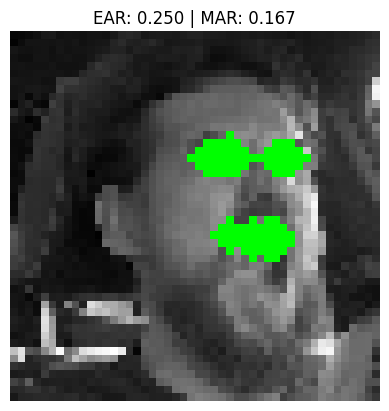

In [47]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt

img_path = 'Drowsy_datset/train/DROWSY/1.png'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

# Landmark indexes dari MediaPipe
LEFT_EYE_IDX = [33, 160, 158, 133, 153, 144]
RIGHT_EYE_IDX = [362, 385, 387, 263, 373, 380]
MOUTH_IDX = [78, 81, 13, 311, 308, 402, 14, 178]

def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

def compute_EAR(landmarks, eye_indices):
    p1, p2, p3, p4, p5, p6 = [landmarks[i] for i in eye_indices]
    A = euclidean(p2, p6)
    B = euclidean(p3, p5)
    C = euclidean(p1, p4)
    return (A + B) / (2.0 * C)

def compute_MAR(landmarks, mouth_indices):
    top = np.mean([landmarks[81], landmarks[13]], axis=0)
    bottom = np.mean([landmarks[14], landmarks[178]], axis=0)
    left = landmarks[78]
    right = landmarks[308]
    return euclidean(top, bottom) / euclidean(left, right)

results = face_mesh.process(image)

if results.multi_face_landmarks:
    h, w, _ = image.shape
    face_landmarks = results.multi_face_landmarks[0]
    landmarks = [(int(p.x * w), int(p.y * h)) for p in face_landmarks.landmark]

    annotated_img = image.copy()
    for i in LEFT_EYE_IDX + RIGHT_EYE_IDX + MOUTH_IDX:
        cv2.circle(annotated_img, landmarks[i], 2, (0, 255, 0), -1)

    ear = compute_EAR(landmarks, LEFT_EYE_IDX)
    mar = compute_MAR(landmarks, MOUTH_IDX)

    plt.imshow(annotated_img)
    plt.title(f"EAR: {ear:.3f} | MAR: {mar:.3f}")
    plt.axis('off')
    plt.show()
else:
    print("Wajah tidak terdeteksi.")


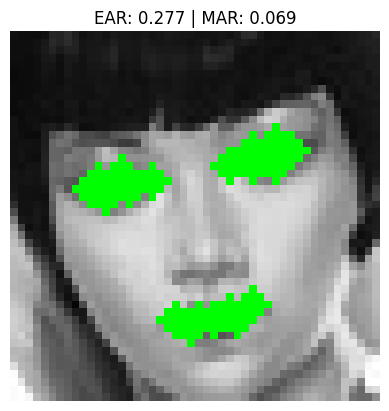

In [48]:
img_path = 'Drowsy_datset/train/NATURAL/1001.png'
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

# Landmark indexes dari MediaPipe
LEFT_EYE_IDX = [33, 160, 158, 133, 153, 144]
RIGHT_EYE_IDX = [362, 385, 387, 263, 373, 380]
MOUTH_IDX = [78, 81, 13, 311, 308, 402, 14, 178]

def euclidean(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

def compute_EAR(landmarks, eye_indices):
    p1, p2, p3, p4, p5, p6 = [landmarks[i] for i in eye_indices]
    A = euclidean(p2, p6)
    B = euclidean(p3, p5)
    C = euclidean(p1, p4)
    return (A + B) / (2.0 * C)

def compute_MAR(landmarks, mouth_indices):
    top = np.mean([landmarks[81], landmarks[13]], axis=0)
    bottom = np.mean([landmarks[14], landmarks[178]], axis=0)
    left = landmarks[78]
    right = landmarks[308]
    return euclidean(top, bottom) / euclidean(left, right)

results = face_mesh.process(image)

if results.multi_face_landmarks:
    h, w, _ = image.shape
    face_landmarks = results.multi_face_landmarks[0]
    landmarks = [(int(p.x * w), int(p.y * h)) for p in face_landmarks.landmark]

    annotated_img = image.copy()
    for i in LEFT_EYE_IDX + RIGHT_EYE_IDX + MOUTH_IDX:
        cv2.circle(annotated_img, landmarks[i], 2, (0, 255, 0), -1)

    ear = compute_EAR(landmarks, LEFT_EYE_IDX)
    mar = compute_MAR(landmarks, MOUTH_IDX)

    plt.imshow(annotated_img)
    plt.title(f"EAR: {ear:.3f} | MAR: {mar:.3f}")
    plt.axis('off')
    plt.show()
else:
    print("Wajah tidak terdeteksi.")


# **Menentukan Threeshold**

In [49]:
import mediapipe as mp

mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

LEFT_EYE_LANDMARKS = [33, 160, 158, 133, 153, 144]
RIGHT_EYE_LANDMARKS = [362, 385, 387, 263, 373, 380]
MOUTH_LANDMARKS = [61, 291, 81, 178, 13, 14]

def euclidean(pt1, pt2):
    return np.linalg.norm(np.array(pt1) - np.array(pt2))

def compute_ear(landmarks, image_shape):
    h, w = image_shape[:2]
    p = [(int(landmarks[i].x * w), int(landmarks[i].y * h)) for i in range(6)]
    ear = (euclidean(p[1], p[5]) + euclidean(p[2], p[4])) / (2.0 * euclidean(p[0], p[3]))
    return ear

def compute_mar(landmarks, image_shape):
    h, w = image_shape[:2]
    p = [(int(landmarks[i].x * w), int(landmarks[i].y * h)) for i in range(6)]
    mar = (euclidean(p[2], p[5]) + euclidean(p[3], p[4])) / (2.0 * euclidean(p[0], p[1]))
    return mar


In [50]:
ear_drowsy, mar_drowsy = [], []
ear_natural, mar_natural = [], []

for idx, img in enumerate(train_images):
    image_rgb = (img * 255).astype('uint8')
    results = face_mesh.process(image_rgb)
    
    if results.multi_face_landmarks:
        face = results.multi_face_landmarks[0]

        ear_left = compute_ear(face.landmark, image_rgb.shape)
        ear_right = compute_ear(face.landmark, image_rgb.shape)
        mar = compute_mar(face.landmark, image_rgb.shape)

        ear_avg = (ear_left + ear_right) / 2.0
        label = np.argmax(train_labels[idx])

        if label == 0:
            ear_natural.append(ear_avg)
            mar_natural.append(mar)
        else:
            ear_drowsy.append(ear_avg)
            mar_drowsy.append(mar)


In [51]:
EAR_THRESHOLD = (np.mean(ear_natural) + np.mean(ear_drowsy)) / 2
MAR_THRESHOLD = (np.mean(mar_natural) + np.mean(mar_drowsy)) / 2

print(f"EAR_THRESHOLD otomatis: {EAR_THRESHOLD:.4f}")
print(f"MAR_THRESHOLD otomatis: {MAR_THRESHOLD:.4f}")


EAR_THRESHOLD otomatis: 0.3559
MAR_THRESHOLD otomatis: 0.8272


In [52]:
y_true = []
y_pred = []

for idx, img in enumerate(train_images):
    image_rgb = (img * 255).astype('uint8')
    results = face_mesh.process(image_rgb)
    
    if results.multi_face_landmarks:
        face = results.multi_face_landmarks[0]
        
        ear_left = compute_ear(face.landmark, image_rgb.shape)
        ear_right = compute_ear(face.landmark, image_rgb.shape)
        mar = compute_mar(face.landmark, image_rgb.shape)
        
        ear_avg = (ear_left + ear_right) / 2.0
        
        if ear_avg < EAR_THRESHOLD or mar > MAR_THRESHOLD:
            prediction = 1
        else:
            prediction = 0
        
        y_pred.append(prediction)
        y_true.append(np.argmax(train_labels[idx]))


# **Evaluasi Model**

=== Laporan Klasifikasi EAR + MAR ===
              precision    recall  f1-score   support

     NATURAL       0.69      0.40      0.51      2389
      DROWSY       0.63      0.85      0.72      2868

    accuracy                           0.64      5257
   macro avg       0.66      0.62      0.61      5257
weighted avg       0.65      0.64      0.62      5257



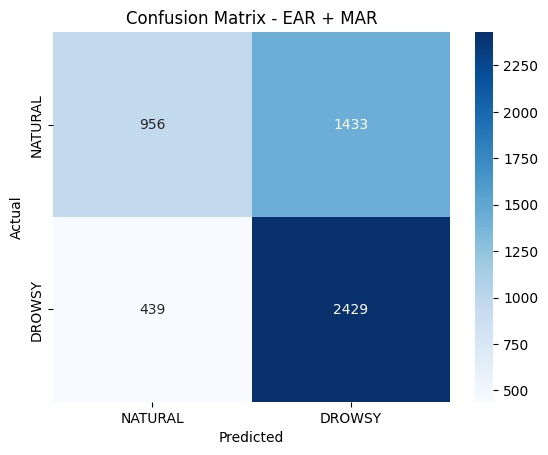

In [53]:
print("=== Laporan Klasifikasi EAR + MAR ===")
print(classification_report(y_true, y_pred, target_names=["NATURAL", "DROWSY"]))

cm = confusion_matrix(y_true, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["NATURAL", "DROWSY"], yticklabels=["NATURAL", "DROWSY"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - EAR + MAR")
plt.show()


# **Konvensional + SVM Classifier**

In [54]:
def extract_ear_mar(images, labels):
    X, y = [], []
    for idx, img in enumerate(images):
        image_rgb = (img * 255).astype('uint8')
        results = face_mesh.process(image_rgb)
        
        if results.multi_face_landmarks:
            face = results.multi_face_landmarks[0]

            ear_left = compute_ear(face.landmark, image_rgb.shape)
            ear_right = compute_ear(face.landmark, image_rgb.shape)
            mar = compute_mar(face.landmark, image_rgb.shape)

            ear_avg = (ear_left + ear_right) / 2.0
            X.append([ear_avg, mar])
            y.append(np.argmax(labels[idx]))
    return np.array(X), np.array(y)

X_train_feat, y_train_feat = extract_ear_mar(train_images, train_labels)
X_test_feat, y_test_feat = extract_ear_mar(test_images, test_labels)


In [55]:
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_feat, y_train_feat)


SVC(probability=True)

# **Evaluasi Model**

Classification Report (SVM on EAR+MAR):
              precision    recall  f1-score   support

           0       0.93      0.32      0.47       561
           1       0.65      0.98      0.78       726

    accuracy                           0.69      1287
   macro avg       0.79      0.65      0.63      1287
weighted avg       0.77      0.69      0.65      1287

Accuracy: 0.6907536907536908


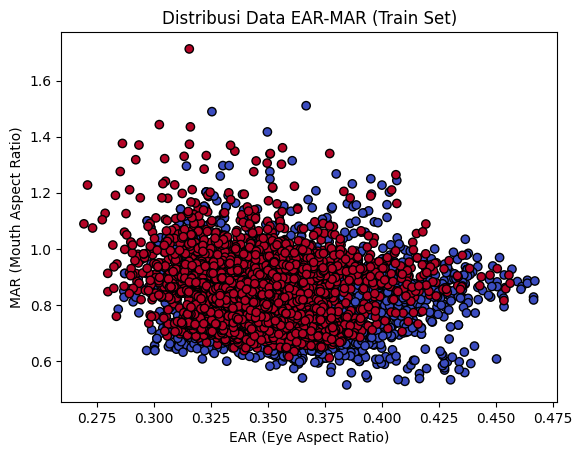

In [56]:
y_pred_svm = svm_model.predict(X_test_feat)

print("Classification Report (SVM on EAR+MAR):")
print(classification_report(y_test_feat, y_pred_svm))
print("Accuracy:", accuracy_score(y_test_feat, y_pred_svm))


plt.scatter(X_train_feat[:, 0], X_train_feat[:, 1], c=y_train_feat, cmap='coolwarm', edgecolors='k')
plt.xlabel("EAR (Eye Aspect Ratio)")
plt.ylabel("MAR (Mouth Aspect Ratio)")
plt.title("Distribusi Data EAR-MAR (Train Set)")
plt.show()

<Figure size 600x600 with 0 Axes>

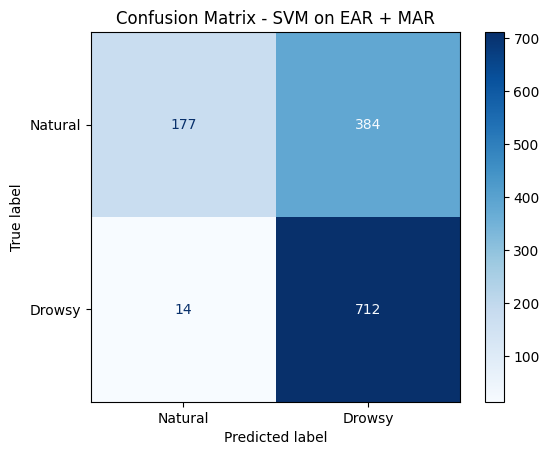

In [57]:
cm = confusion_matrix(y_test_feat, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Natural', 'Drowsy'])

plt.figure(figsize=(6,6))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - SVM on EAR + MAR")
plt.show()